In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import statsmodels.api as sm
%matplotlib inline

In [2]:
ultimate_df = pd.read_excel( 'ultimate_df_15to20.xlsx' )
ultimate_df.head()

,Rk,year,Player,Pos,Age,HT,WT,YOS,Draft Year,Final Pick,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,2015,Quincy Acy,PF,24,2.006502,108.843537,2,2012,37,...,0.783505,79,222,301,68,27,22,60,147,398
1,2,2015,Jordan Adams,SG,20,1.955705,94.784581,0,2014,22,...,0.608696,9,19,28,16,16,7,14,24,94
2,3,2015,Steven Adams,C,21,2.108097,120.181406,1,2013,12,...,0.502439,199,324,523,66,38,86,99,222,537
3,4,2015,Jeff Adrien,PF,28,2.006502,111.111111,4,2009,80,...,0.578947,23,54,77,15,4,9,9,30,60
4,5,2015,Arron Afflalo,SG,29,1.955705,95.238095,7,2007,27,...,0.843434,27,220,247,129,41,7,116,167,1035


In [3]:
ultimate_df.columns

Index(['Rk', 'year', 'Player', 'Pos', 'Age', 'HT', 'WT', 'YOS', 'Draft Year',
       'Final Pick', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [4]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          3053 non-null   int64  
 1   year        3053 non-null   int64  
 2   Player      3053 non-null   object 
 3   Pos         3053 non-null   object 
 4   Age         3053 non-null   int64  
 5   HT          3053 non-null   float64
 6   WT          3053 non-null   float64
 7   YOS         3053 non-null   int64  
 8   Draft Year  3053 non-null   int64  
 9   Final Pick  3053 non-null   int64  
 10  Tm          3053 non-null   object 
 11  G           3053 non-null   int64  
 12  GS          3053 non-null   int64  
 13  MP          3053 non-null   int64  
 14  FG          3053 non-null   int64  
 15  FGA         3053 non-null   int64  
 16  FG%         3053 non-null   float64
 17  3P          3053 non-null   int64  
 18  3PA         3053 non-null   int64  
 19  3P%         3053 non-null  

In [5]:
 X_features = ['Pos', 'HT', 'WT', 'YOS','Draft Year','Final Pick','G','FT%', 'TRB','AST','STL','BLK']
X_df = ultimate_df[X_features]
Y = ultimate_df['3P'] 

In [6]:
X_df =pd.get_dummies(X_df, drop_first=True)
X_df.head()

,HT,WT,YOS,Draft Year,Final Pick,G,FT%,TRB,AST,STL,BLK,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,2.006502,108.843537,2,2012,37,68,0.783505,301,68,27,22,1,0,0,0
1,1.955705,94.784581,0,2014,22,30,0.608696,28,16,16,7,0,0,0,1
2,2.108097,120.181406,1,2013,12,70,0.502439,523,66,38,86,0,0,0,0
3,2.006502,111.111111,4,2009,80,17,0.578947,77,15,4,9,1,0,0,0
4,1.955705,95.238095,7,2007,27,78,0.843434,247,129,41,7,0,0,0,1


In [7]:
X_df.corr()

,HT,WT,YOS,Draft Year,Final Pick,G,FT%,TRB,AST,STL,BLK,Pos_PF,Pos_PG,Pos_SF,Pos_SG
HT,1.000000,0.815083,0.043324,-0.060553,-0.167363,0.026789,-0.100586,0.254201,-0.238449,-0.115708,0.320959,0.232220,-0.488639,0.041706,-0.222154
WT,0.815083,1.000000,0.119879,-0.130678,-0.186746,0.055334,-0.072538,0.294561,-0.184026,-0.083319,0.321207,0.239404,-0.431441,-0.017271,-0.227867
YOS,0.043324,0.119879,1.000000,-0.890174,-0.334758,0.196450,0.166073,0.174574,0.195321,0.166539,0.102564,0.009756,-0.008094,0.009292,-0.041629
Draft Year,-0.060553,-0.130678,-0.890174,1.000000,0.226557,-0.215356,-0.153604,-0.163267,-0.171813,-0.165488,-0.094934,-0.009200,-0.006662,-0.014803,0.048961
Final Pick,-0.167363,-0.186746,-0.334758,0.226557,1.000000,-0.280966,-0.130309,-0.301309,-0.218360,-0.256796,-0.253500,-0.010161,0.030842,0.045715,0.042792
G,0.026789,0.055334,0.196450,-0.215356,-0.280966,1.000000,0.408316,0.696255,0.565539,0.723157,0.504664,-0.014561,-0.000945,0.012969,-0.018917
FT%,-0.100586,-0.072538,0.166073,-0.153604,-0.130309,0.408316,1.000000,0.183209,0.286556,0.293461,0.082093,-0.068992,0.109719,-0.007746,0.061742
TRB,0.254201,0.294561,0.174574,-0.163267,-0.301309,0.696255,0.183209,1.000000,0.460531,0.627667,0.785333,0.097832,-0.153109,-0.045069,-0.192706
AST,-0.238449,-0.184026,0.195321,-0.171813,-0.218360,0.565539,0.286556,0.460531,1.000000,0.768684,0.219652,-0.148048,0.404140,-0.084286,-0.019672
STL,-0.115708,-0.083319,0.166539,-0.165488,-0.256796,0.723157,0.293461,0.627667,0.768684,1.000000,0.413918,-0.101537,0.139561,0.055996,0.023659


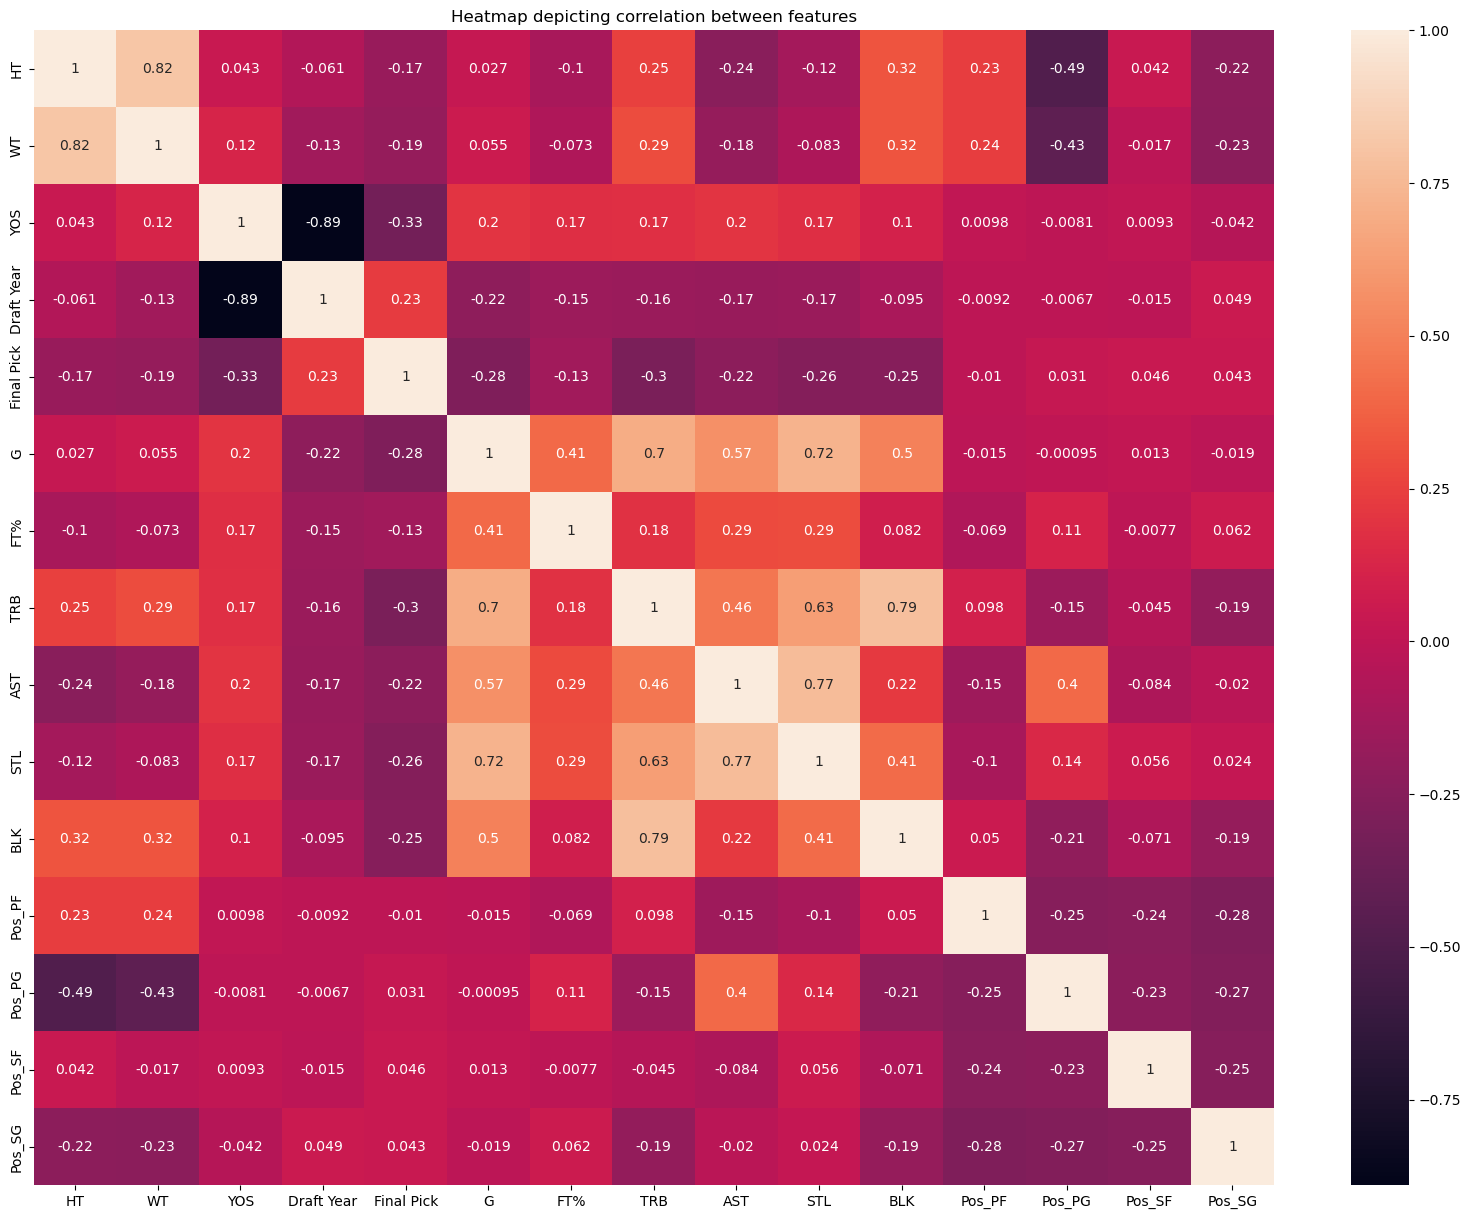

In [8]:
plt.figure( figsize = (20,15) )
sn.heatmap(X_df.corr(), annot = True);
plt.title("Heatmap depicting correlation between features");

In [9]:
X_df = X_df.drop(['STL','TRB', 'WT'], axis=1)
#mention why we also dropped WT

In [10]:
X = sm.add_constant(X_df)

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size = 0.2, random_state = 5)

In [12]:
train_X.columns

Index(['const', 'HT', 'YOS', 'Draft Year', 'Final Pick', 'G', 'FT%', 'AST',
       'BLK', 'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG'],
      dtype='object')

In [13]:
p3_model = sm.OLS(train_Y, train_X).fit()

In [14]:
p3_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.535     
Dependent Variable: 3P               AIC:                24697.8898
Date:               2023-01-11 01:46 BIC:                24773.2972
No. Observations:   2442             Log-Likelihood:     -12336.   
Df Model:           12               F-statistic:        235.4     
Df Residuals:       2429             Prob (F-statistic): 0.00      
R-squared:          0.538            Scale:              1437.4    
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const      -5151.0930 757.0750 -6.8039 0.0000 -6635.6725 -3666.5134
HT            -2.7868  11.8280 -0.2356 0.8138   -25.9807    20.4071
YOS            3.0710   0.4264  7.2017 0.0000     2.2348     3.9072
Draft Year     2.5321   0.3738  6.7737 0.0000     1.7991     3.2651
Final Pick     0.0509   0.0319  1.5971 0.1104    -0.0116     0.1133
G              0.7867   0.0460 17.1046 0.0000     0.6965     0.8769
FT%           28.0963   4.1085  6.8386 0.0000    20.0398    36.1529
AST            0.1707   0.0088 19.3581 0.0000     0.1534     0.1880
BLK           -0.2046   0.0387 -5.2868 0.0000    -0.2805    -0.1287
Pos_PF        22.5442   2.6265  8.5835 0.0000    17.3939    27.6946
Pos_PG         9.4677   3.7053  2.5552 0.0107     2.2019    16.7336
Pos_SF        34.6337   2.8882 11.9915 0.0000    28.9702    40.2973
Pos_SG        40.1465   3.0566 13.1343 0.0000    34.1527    46.1404
-------------------------------------------------------------------
Omnibus:             558.760       Durbin-Watson:          1.926   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       2102.999
Skew:                1.087         Prob(JB):               0.000   
Kurtosis:            6.993         Condition No.:          1988976 
===================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [15]:
train_X2= train_X.drop('HT', axis = 1)
p3_model_2 = sm.OLS(train_Y, train_X2).fit()
p3_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.536     
Dependent Variable: 3P               AIC:                24695.9456
Date:               2023-01-11 01:46 BIC:                24765.5524
No. Observations:   2442             Log-Likelihood:     -12336.   
Df Model:           11               F-statistic:        256.9     
Df Residuals:       2430             Prob (F-statistic): 0.00      
R-squared:          0.538            Scale:              1436.9    
-------------------------------------------------------------------
             Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const      -5175.6994 749.6915 -6.9038 0.0000 -6645.7999 -3705.5988
YOS            3.0810   0.4242  7.2633 0.0000     2.2492     3.9129
Draft Year     2.5414   0.3717  6.8381 0.0000     1.8126     3.2702
Final Pick     0.0521   0.0314  1.6586 0.0973    -0.0095     0.1137
G              0.7872   0.0459 17.1318 0.0000     0.6971     0.8773
FT%           28.0899   4.1076  6.8385 0.0000    20.0351    36.1447
AST            0.1707   0.0088 19.3675 0.0000     0.1534     0.1880
BLK           -0.2050   0.0387 -5.3033 0.0000    -0.2808    -0.1292
Pos_PF        22.6505   2.5870  8.7557 0.0000    17.5776    27.7233
Pos_PG         9.9136   3.1849  3.1127 0.0019     3.6682    16.1591
Pos_SF        34.8219   2.7750 12.5483 0.0000    29.3803    40.2636
Pos_SG        40.4571   2.7573 14.6726 0.0000    35.0501    45.8640
-------------------------------------------------------------------
Omnibus:             558.277       Durbin-Watson:          1.926   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       2103.680
Skew:                1.085         Prob(JB):               0.000   
Kurtosis:            6.995         Condition No.:          1969955 
===================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [16]:
significant_Features=['YOS','Draft Year','Final Pick','G','FT%','AST','BLK','Pos_PF','Pos_PG','Pos_SF','Pos_SG']

In [17]:
test_X = sm.add_constant(test_X[significant_Features])

In [18]:
pred_y = p3_model_2.predict(test_X)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

np.abs(r2_score(test_Y, pred_y))

0.5182261853685959

In [20]:
np.sqrt(mean_squared_error(test_Y, pred_y))

37.38415977248166

In [21]:
p3_model.params

const        -5151.092954
HT              -2.786829
YOS              3.070971
Draft Year       2.532105
Final Pick       0.050875
G                0.786717
FT%             28.096350
AST              0.170673
BLK             -0.204574
Pos_PF          22.544220
Pos_PG           9.467725
Pos_SF          34.633739
Pos_SG          40.146537
dtype: float64